In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "lable=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "lable={},prediction={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "lable={}".format(str(labels[idx])) 
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

In [3]:
mapping_df = pd.read_csv('//data/examples/may_the_4_be_with_u/where_am_i/mid_term_mapping.txt' ,header=None)
mapping_df.columns = ['folder_name', 'label']
mapping_df.sample(5)

,folder_name,label
10,mountain,8
14,tallbuilding,13
9,livingroom,5
5,highway,14
3,coast,10


In [4]:
test_submit_df = pd.read_csv('//data/examples/may_the_4_be_with_u/where_am_i/img-submission.csv')
#test_submit_df.columns = ['file_name', 'label']
print(len(test_submit_df))

1500


In [5]:
import os
image_mapping_path_df = pd.DataFrame(columns=['folder_name', 'label', 'path'])
path = "//data/examples/may_the_4_be_with_u/where_am_i/"
pathData = []
for x in range(0, len(mapping_df['folder_name'])):
    folder_name = mapping_df['folder_name'][x]
    label = mapping_df['label'][x]
    class_folder = path + "train/" + folder_name
    for train_imgName in os.listdir(class_folder):
        train_data_path = class_folder + "/" + train_imgName
        s = pd.DataFrame([[folder_name, label, train_data_path]],columns=['folder_name', 'label', 'path'])
        image_mapping_path_df = image_mapping_path_df.append(s, ignore_index=True)
image_mapping_path_df.sample(5)

,folder_name,label,path
131,CALsuburb,9.0,//data/examples/may_the_4_be_with_u/where_am_i...
496,coast,10.0,//data/examples/may_the_4_be_with_u/where_am_i...
473,coast,10.0,//data/examples/may_the_4_be_with_u/where_am_i...
435,coast,10.0,//data/examples/may_the_4_be_with_u/where_am_i...
2279,opencountry,6.0,//data/examples/may_the_4_be_with_u/where_am_i...


In [6]:
image_width = 16
image_high = 16
image_cnn_shape = (image_width//4) * (image_high//4)
image = cv2.imread(image_mapping_path_df["path"][0])
image = cv2.resize(image, (image_width, image_high))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#train = np.reshape(image, (32, 32))
train = np.expand_dims(image, axis=0)
#train = np.reshape(image, (1, 262, 200))
train_label = np.zeros(0, dtype=float)
train_label = np.append(train_label, image_mapping_path_df["label"][0])
for x in range(1, len(image_mapping_path_df)):
    path = image_mapping_path_df["path"][x]
    label = image_mapping_path_df["label"][x]
    image = cv2.imread(path)
    image = cv2.resize(image, (image_width, image_high))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #train = np.reshape(image, (32, 32))
    image = np.expand_dims(image, axis=0)
    train = np.concatenate((train,image), axis=0)
    train_label = np.append(train_label, label)

print("\t[Info] Shape of train data=%s" % (str(train.shape)))
print("\t[Info] Shape of train label=%s" % (str(train_label.shape)))

	[Info] Shape of train data=(2985, 16, 16)
	[Info] Shape of train label=(2985,)


In [7]:
path = "//data/examples/may_the_4_be_with_u/where_am_i/"
test_path = path + "testset/"
image = cv2.imread(test_path + test_submit_df["id"][0] + ".jpg")
image = cv2.resize(image, (image_width, image_high))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
test = np.expand_dims(image, axis=0)
for x in range(1, len(test_submit_df)):
    path = test_path + test_submit_df["id"][x] + ".jpg"
    image = cv2.imread(path)
    image = cv2.resize(image, (image_width, image_high))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = np.expand_dims(image, axis=0)
    test = np.concatenate((test,image), axis=0)
    
test_label = np.zeros(0, dtype=float)

print("\t[Info] Shape of test data=%s" % (str(test.shape)))
print("\t[Info] Shape of test_label=%s" % (str(test_label.shape)))

	[Info] Shape of test data=(1500, 16, 16)
	[Info] Shape of test_label=(0,)


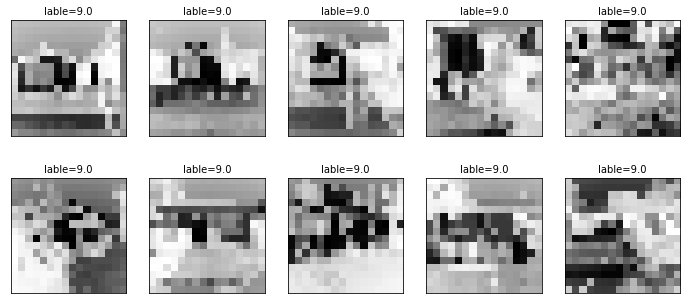

In [8]:
plot_images_labels_predict(train, train_label, [], 0)

In [9]:
train = train.reshape(2985, image_width*image_high).astype('float32')
test = test.reshape(1500, image_width*image_high).astype('float32')
print("\t[Info] xTrain: %s" % (str(train.shape)))
print("\t[Info] xTest: %s" % (str(test.shape)))

	[Info] xTrain: (2985, 256)
	[Info] xTest: (1500, 256)


In [10]:
y_TrainOneHot = np_utils.to_categorical(train_label) # 將 training 的 label 進行 one-hot encoding

print(train_label[0]) # 檢視 training labels 第一個 label 的值
y_TrainOneHot[:1] # 檢視第一個 label 在 one-hot encoding 後的結果, 會在第10個位置上為 1, 其他位置上為 0

9.0


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.]])

In [11]:
#----------------------------資料training set, testing set 分割---------------------------------------
x_train, x_test, y_train, y_test = train_test_split(train,
                                                    y_TrainOneHot,
                                                    test_size = 0.1,
                                                    stratify  = train_label)
#資料training set, validation set 分割
train_ratio = 0.9
x_train, x_valid, y_train, y_valid = train_test_split(train,
                                                      y_TrainOneHot,
                                                      test_size = 1.0 - train_ratio,
                                                      stratify = y_TrainOneHot.argmax(axis = 1))
print("training set: %i" % len(x_train))
print("test set: %i" % len(x_test))
print("validation set: %i" % len(x_valid))

training set: 2686
test set: 299
validation set: 299


In [14]:
from __future__ import print_function
import tensorflow as tf

batch_size = 32
epochs = 400
lr = 0.0001

#def compute_accuracy(v_xs, v_ys):
#    global prediction
#    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
#    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
#    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
#    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, image_width*image_high])/255.   # 200*256
ys = tf.placeholder(tf.float32, [None, 15])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, image_width, image_high, 1])
# print(x_image.shape)  # [n_samples, 256,200,1]

## conv1 layer ##
W_conv1 = weight_variable([5,5, 1,32]) # patch 5x5, in size 1, out size 32
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 200x256x32
h_pool1 = max_pool_2x2(h_conv1)                          # output size 100x128x32

## conv2 layer ##
W_conv2 = weight_variable([5,5, 32, 64]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 100x128x64
h_pool2 = max_pool_2x2(h_conv2)                          # output size 50x64x64

## fc1 layer ##
W_fc1 = weight_variable([image_cnn_shape*64, 1024])
b_fc1 = bias_variable([1024])
# [n_samples, 50, 64, 64] ->> [n_samples, 50*64*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, image_cnn_shape*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
W_fc2 = weight_variable([1024, 15])
b_fc2 = bias_variable([15])
output = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


# the error between prediction and real data
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1]))       # loss
#train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(cross_entropy)

with tf.name_scope('cross_entropy'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=ys))

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(output),1), tf.argmax(ys,1)) #如果答案對則回傳true
    compute_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #將回傳的true/false轉乘1/0並計算平均(計算正確率)

with tf.name_scope('train'):
    #使用adam做optimization最小化loss funciotn(不斷取微分並逼近local min)
    train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

100%|██████████| 400/400 [02:11<00:00,  3.04it/s]


--- training done ---
testing accuracy: 0.92
loss


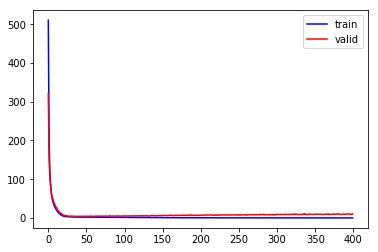

accuracy


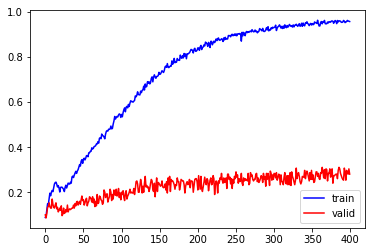

In [15]:
train_loss_list, valid_loss_list = [], []
train_acc_list, valid_acc_list = [], []

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
init = tf.global_variables_initializer()
sess.run(init)

#for i in range(100):
#    batch_xs, batch_ys = mnist.train.next_batch(100)
#    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
#    if i % 50 == 0:
#        print(compute_accuracy(
#            mnist.test.images[:1000], mnist.test.labels[:1000]))

for i in tqdm(range(epochs)):
    # get batch 
    total_batch = int(np.floor(len(x_train) / batch_size)) # just drop out last few samples...
        
    train_loss_collector, train_acc_collector = [], []
    for j in np.arange(total_batch):
        batch_idx_start = j * batch_size
        batch_idx_stop = (j+1) * batch_size

        x_batch = x_train[batch_idx_start : batch_idx_stop]
        y_batch = y_train[batch_idx_start : batch_idx_stop]
            
        this_loss, this_acc, _ = sess.run([loss, compute_acc, train_step], feed_dict = {xs: x_batch, ys: y_batch, keep_prob: 0.5})
        train_loss_collector.append(this_loss)
        train_acc_collector.append(this_acc)
            
        # do validation at the end of each epoch
    valid_acc, valid_loss = sess.run([compute_acc, loss], feed_dict = {xs: x_valid, ys : y_valid, keep_prob: 0.5})
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    train_loss_list.append(np.mean(train_loss_collector))
    train_acc_list.append(np.mean(train_acc_collector))

    # at the end of each epoch, shuffle the data
    x_train, y_train = shuffle(x_train, y_train)
# At the end of the training, do testing set
test_acc, test_loss = sess.run([compute_acc, loss], feed_dict = {xs: x_test, ys : y_test, keep_prob: 0.5})
print('--- training done ---')
print('testing accuracy: %.2f' % test_acc)
#--------------------------------------plot---------------------------------------------
print("loss")
plt.plot(np.arange(len(train_loss_list)), train_loss_list, 'b', label = 'train')
plt.plot(np.arange(len(valid_loss_list)), valid_loss_list, 'r', label = 'valid')
plt.legend()
plt.show()

print("accuracy")
plt.plot(np.arange(len(train_acc_list)), train_acc_list, 'b', label = 'train')
plt.plot(np.arange(len(valid_acc_list)), valid_acc_list, 'r', label = 'valid')
plt.legend(loc = 4)
plt.show()